Finance with Big Data

PC Lab #2: Applying the CAPM (Week 3)

DSBA, Bocconi University


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
import warnings
import statsmodels.api as sm
import itertools
import yfinance as yf

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Data_PCLab1_Stock.csv')
df.set_index('Date', inplace=True)
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


# Task 1
### Scatter Plots: Stock vs. S&P 500 Daily Returns

In this analysis, we visualize the relationship between the daily returns of individual stocks and the daily returns of the S&P 500 index. Scatter plots are created to illustrate how each stock's returns correspond to the market's performance.

#### Methodology

1. **Data Preparation**:
   - Daily returns are calculated for each of the 8 stocks and the S&P 500 index. These returns represent the percentage change in stock prices on a daily basis.
   - The market returns are extracted from the S&P 500 data.

2. **Scatter Plots**:
   - For each stock, a scatter plot is generated, where:
     - The x-axis represents the daily returns of the S&P 500 (market returns).
     - The y-axis represents the daily returns of the specific stock.
     - A trendline is added using ordinary least squares (OLS) regression to visually depict the relationship.
     - The slope of the trendline is calculated, which will later be interpreted as the Beta value.

3. **Interpretation**:
   - The scatter plots allow us to observe how changes in the S&P 500 returns correlate with changes in each stock's returns.
   - The slope of the trendline (Beta) indicates the stock's sensitivity to market movements. A slope greater than 1 implies higher volatility than the market, while a slope less than 1 suggests lower volatility.

#### Visualization

The scatter plots below illustrate the daily returns of each stock in relation to the S&P 500 daily returns. Each plot is color-coded to differentiate between stocks, and a trendline is included to highlight the linear relationship between the two variables.


In [4]:
# Calculating daily and market returns (S&P 500 returns)
daily = df.pct_change() * 100
market_returns = daily['sp500']

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan']
common_range = [-25, 25]
tick_values = list(range(int(common_range[0]), int(common_range[1]) + 1, 5))  # Adjust the steps for plots

stocks = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

for i, stock in enumerate(stocks):
    fig = px.scatter(
        daily,
        x='sp500',
        y=stock,
        trendline='ols',
        color_discrete_sequence=[colors[i]],
        title=f'{stock} vs. S&P 500 Daily Returns'
    )

    # Calculate the best fit line
    x = daily['sp500'].dropna().values.reshape(-1, 1)
    y = daily[stock].dropna().values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Extract the slope from the model (which later will be recalculated as Beta!)

    fig.add_annotation(
        text=f'Slope: {slope:.4f}',
        xref='paper', yref='paper',
        x=0.9, y=0.1,
        showarrow=False,
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 0.7)'
    )

    fig.update_layout(
        plot_bgcolor='white',
        xaxis=dict(showgrid=True, gridcolor='lightgray', zerolinecolor='lightgray', tickvals=tick_values),
        yaxis=dict(showgrid=True, gridcolor='lightgray', zerolinecolor='lightgray', tickvals=tick_values),
        width=700,
        height=700
    )

    fig.show()


In [5]:
correlation_coefficient = daily.corr()
correlation_coefficient

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385249,0.341373,0.384088,0.410233,0.434534,0.288534,0.509124,0.657320
BA,0.385249,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384088,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439141,0.631449
AMZN,0.410233,0.267466,0.233145,0.309016,1.000000,0.339589,0.310083,0.575283,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245610,0.458816,0.703935
TSLA,0.288534,0.250946,0.152515,0.311879,0.310083,0.245610,1.000000,0.322804,0.387920
GOOG,0.509124,0.388048,0.353695,0.439141,0.575283,0.458816,0.322804,1.000000,0.684571
sp500,0.657320,0.641826,0.617463,0.631449,0.539560,0.703935,0.387920,0.684571,1.000000


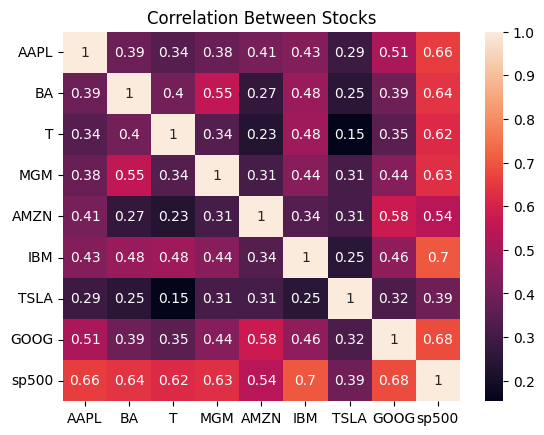

In [6]:
import seaborn as sns
# i Create a DataFrame containing only the stock returns (excluding 'Date')
stock_returns = daily
# i Calculate the correlation matrix
correlation_matrix = stock_returns.corr()
# i Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cbar=True)
plt.title('Correlation Between Stocks')
plt.show()

The fact that IBM's daily returns have the highest correlation with the S&P 500 daily returns is likely due to several factors. For example IBM is a large-cap company, and it is one of the components of the S&P 500 index. Larger companies often have a significant impact on the performance of broad market indices like the S&P 500.

---

# Task 2
## Alpha and Beta Coefficients for Stocks (OLS Regression)

In this analysis, we apply the Capital Asset Pricing Model (CAPM) by performing an Ordinary Least Squares (OLS) regression of individual stock returns on market returns. The objective is to estimate the alpha (intercept) and beta (slope) coefficients for each stock, assuming a risk-free rate (rf) of 0.

#### Methodology

1. **Data Preparation**:
   - We begin with daily returns for each of the 8 stocks and the market returns (S&P 500) over the entire period.

2. **OLS Regression**:
   - For each stock, an OLS regression model is fitted with market returns as the independent variable and the stock returns as the dependent variable.
   - The model estimates two coefficients:
     - Alpha (α): Represents the intercept of the regression line. It reflects the stock's excess return not explained by market returns.
     - Beta (β): Represents the slope of the regression line. It indicates the stock's sensitivity to market movements.

3. **Results**:
   - The results are collected into a DataFrame containing information about each stock's Alpha and Beta coefficients.

#### Interpretation

- Alpha (α) measures whether a stock outperforms or underperforms the market when market returns are zero. A positive alpha suggests outperformance, while a negative alpha suggests underperformance.
- Beta (β) indicates the stock's sensitivity to market movements. A beta greater than 1 implies higher volatility than the market, while a beta less than 1 indicates lower volatility.


In [7]:
# lets's save all daily returs in one place:
stock_columns = [col for col in stock_returns.columns if col != 'Date' and col != 'sp500']

# Step 2: Apply CAPM - Run OLS regression for each stock
import statsmodels.api as sm

#first we create an empty df for saving the regression results later
results = pd.DataFrame(columns=['Stock', 'Alpha (%)', 'Beta', 'R-squared', 'Alpha P-value', 'Beta P-value'])
error_terms = {}


for column in stock_columns:
    stock_name = column

    # Prepare the data for regression
    X = sm.add_constant(stock_returns['sp500'])  # Market returns
    y = stock_returns[column]  # Stock returns

    # Fit the linear regression model
    model = sm.OLS(y, X, missing='drop').fit()

    # Extract regression results including alpha and beta p-values
    alpha = model.params['const']
    beta = model.params['sp500']
    alpha_pvalue = model.pvalues['const']
    beta_pvalue = model.pvalues['sp500']

    # Store regression results in the DataFrame
    results = results.append({
        'Stock': stock_name,
        'Alpha (%)': alpha,
        'Beta': beta,
        'R-squared': model.rsquared,
        'Alpha P-value': alpha_pvalue,
        'Beta P-value': beta_pvalue
    }, ignore_index=True)
 #Predicted returns
    y_pred = model.predict(X)

    # Calculate error terms (residuals)
    error = y - y_pred

    # Store error terms in the dictionary
    error_terms[stock_name] = error

# Print the CAPM results including p-values
print("CAPM Results with P-values:")
print(results)



CAPM Results with P-values:
  Stock  Alpha (%)      Beta  R-squared  Alpha P-value   Beta P-value
0  AAPL   0.052837  1.112891   0.432070       0.067202  3.521164e-267
1    BA  -0.002292  1.382867   0.411941       0.951096  7.299279e-251
2     T  -0.028577  0.744630   0.381261       0.182942  4.892378e-227
3   MGM  -0.016893  1.653568   0.398728       0.712986  1.874186e-240
4  AMZN   0.102261  0.991732   0.291125       0.003512  2.611172e-163
5   IBM  -0.053480  0.960416   0.495525       0.014747  1.185758e-322
6  TSLA   0.175917  1.268611   0.150482       0.009920   1.965135e-78
7  GOOG   0.033371  1.034881   0.468638       0.180655  2.345742e-298


#### Visualization

The bar charts below visualize the Alpha and Beta coefficients for the 8 stocks. The blue bars represent Alpha, while the orange bars represent Beta. These charts provide insights into which stocks have the highest and lowest Alpha and Beta values.


To determine if the estimated alpha and beta coefficients in the CAPM regressions are statistically significant, we can examine the p-values associated with these coefficients. In statistical hypothesis testing, a p-value indicates the probability of observing a test statistic as extreme as, or more extreme than, the one computed from the data under the null hypothesis (typically, the null hypothesis is that the coefficient is equal to zero).

For Alpha (Intercept) P-value:

Null Hypothesis (H0): Alpha (Intercept) is equal to zero. Alternative Hypothesis (H1): Alpha (Intercept) is not equal to zero. If the p-value associated with Alpha is small (typically less than 0.05), it suggests that the estimated alpha is statistically significant, indicating that the stock's returns are not solely explained by the market. Amazon, IBM, and Tesla are like this.

For Beta (Market Coefficient) P-value:

Null Hypothesis (H0): Beta (Market Coefficient) is equal to zero. Alternative Hypothesis (H1): Beta (Market Coefficient) is not equal to zero. If the p-value associated with Beta is small (typically less than 0.05), it suggests that the estimated beta is statistically significant, indicating that the stock's returns are linearly related to the market returns. Here they are all very small, indicating that all stock's returns are linearly related to the market returns. though the least related is tesla. im going to plot them:

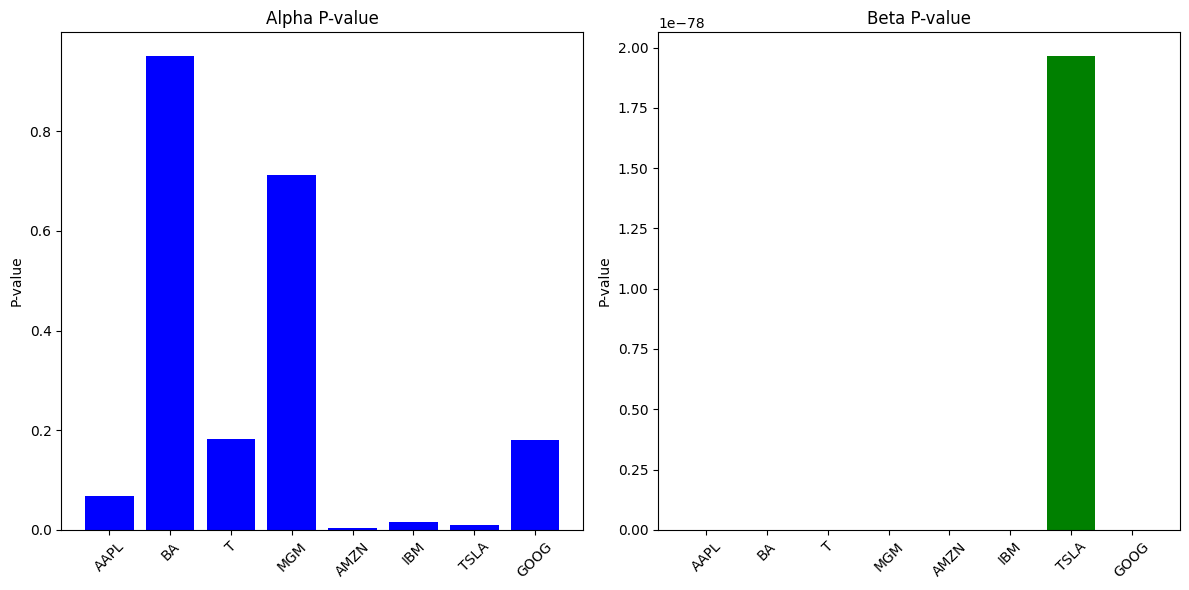

In [10]:
# Plot p-values for Alpha and Beta
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(results['Stock'], results['Alpha P-value'], color='blue')
plt.title('Alpha P-value')
plt.ylabel('P-value')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(results['Stock'], results['Beta P-value'], color='green')
plt.title('Beta P-value')
plt.ylabel('P-value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Sort the results DataFrame by Beta and Alpha columns
results_sorted_by_beta = results.sort_values(by='Beta', ascending=False)
results_sorted_by_alpha = results.sort_values(by='Alpha (%)', ascending=False)

# Retrieve the stock with the highest and lowest Beta and Alpha values
highest_beta_stock = results_sorted_by_beta.iloc[0]['Stock']
lowest_beta_stock = results_sorted_by_beta.iloc[-1]['Stock']
highest_alpha_stock = results_sorted_by_alpha.iloc[0]['Stock']
lowest_alpha_stock = results_sorted_by_alpha.iloc[-1]['Stock']

# Display the results
print(f"Highest Beta Stock: {highest_beta_stock}")
print(f"Lowest Beta Stock: {lowest_beta_stock}")
print(f"Highest Alpha Stock: {highest_alpha_stock}")
print(f"Lowest Alpha Stock: {lowest_alpha_stock}")


Highest Beta Stock: MGM
Lowest Beta Stock: T
Highest Alpha Stock: TSLA
Lowest Alpha Stock: IBM


Alpha (α):

High Alpha: A high alpha, also known as positive alpha, indicates that a stock has generated returns greater than what would be expected based on its beta and the overall market's returns. In other words, it suggests that the stock has outperformed the market or benchmark index, considering its level of risk (beta). High alpha is often seen as a sign of good performance or skilled management. This is the true case for Tesla.

Low Alpha: A low alpha, also known as negative alpha, suggests that a stock has generated returns lower than what would be expected based on its beta and the market's returns. This can indicate underperformance relative to the market. This is true for IBM. We also saw above that IBM is the most correlated with the market.

Beta (β):

High Beta: A high beta value (greater than 1) indicates that a stock is more volatile and tends to move more significantly in response to market fluctuations. High-beta stocks are considered riskier because they are more sensitive to market movements. They can provide higher returns during bull markets but may also experience larger losses during bear markets. This is the case for mgm. which is understandable since when people don't have money they dont invest in entertainment.

Low Beta: A low beta value (less than 1) indicates that a stock is less volatile and tends to be more stable compared to the overall market. Low-beta stocks are considered less risky because they are less sensitive to market fluctuations. They may provide more stability in a portfolio but might offer lower returns during bull markets. This is the case for T which is understandable since it is a very safe stock.

## Computation and Histograms of Error Terms for Each Stock

In this analysis, we are interested in understanding the distribution of error terms (εi) for each stock. Error terms represent the discrepancies between the observed returns of the stocks and the returns predicted by the Capital Asset Pricing Model (CAPM). These histograms provide insights into how well the CAPM model aligns with the actual stock returns.

#### Methodology

1. **Data Preparation**:
   - We start with observed returns for each stock and the predicted returns based on the CAPM model, considering the stock's alpha (α) and beta (β) values. The risk-free rate (rf) is assumed to be zero.

2. **Calculation of Error Terms (εi)**:
   - Error terms (εi) are calculated as the differences between observed returns and predicted returns for each stock. These error terms represent the variations that the CAPM model does not explain.

3. **Histograms**:
   - For each stock, a histogram is plotted to visualize the distribution of error terms. We use 30 bins to create these histograms and normalize them for density.

#### Interpretation

- A symmetrical distribution around zero suggests that the CAPM model performs reasonably well for the stock.
- Skewness in the distribution may indicate areas where the CAPM model overestimates or underestimates returns.

By examining these histograms, we can gain insights into the model's accuracy for each stock and identify potential outliers or areas where the model may need further refinement.


In [13]:
error_terms_df.head()

""


Overall the error terms seem normal, but we can't just judge by the graph. So let's tets them. A Q-Q plot, short for “quantile-quantile” plot, is often used to assess whether or not a set of data potentially came from some theoretical distribution.

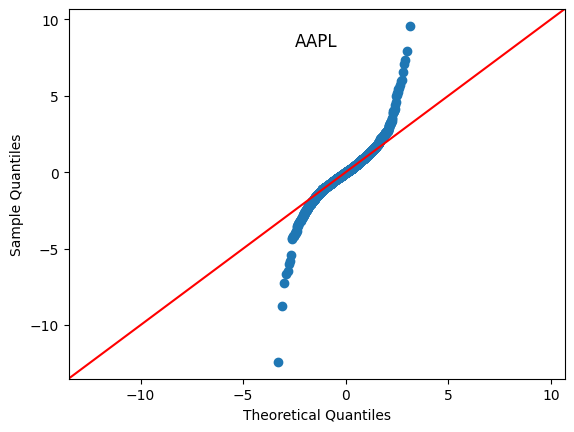

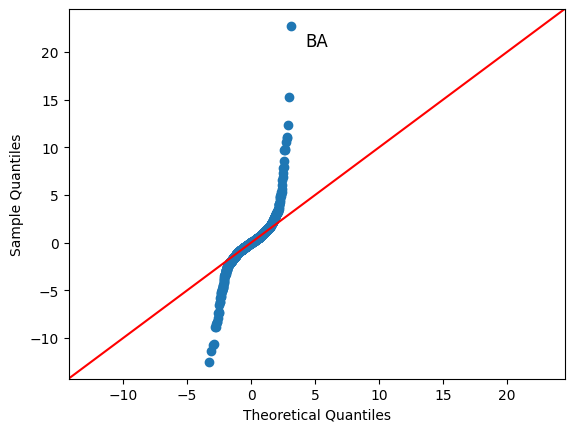

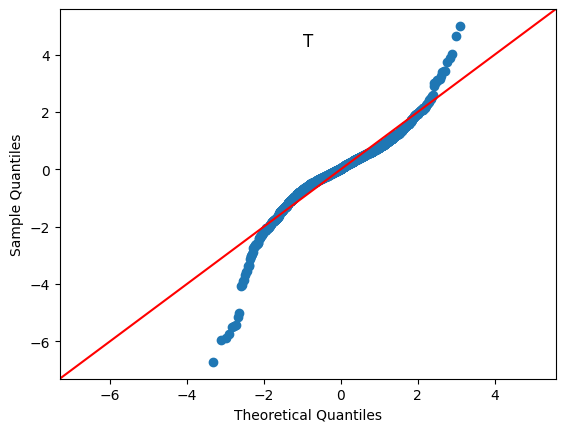

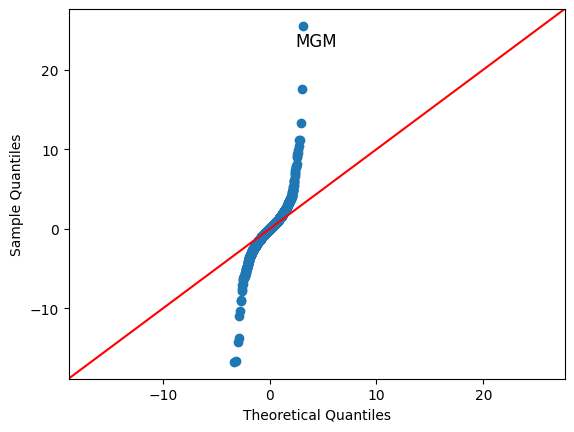

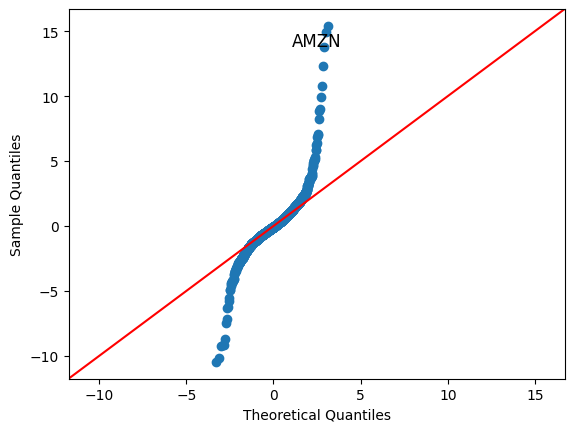

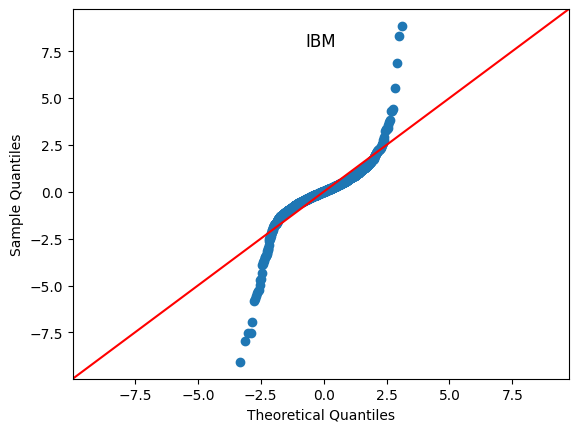

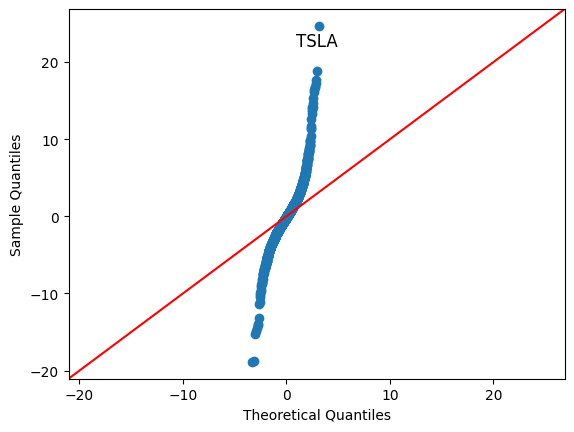

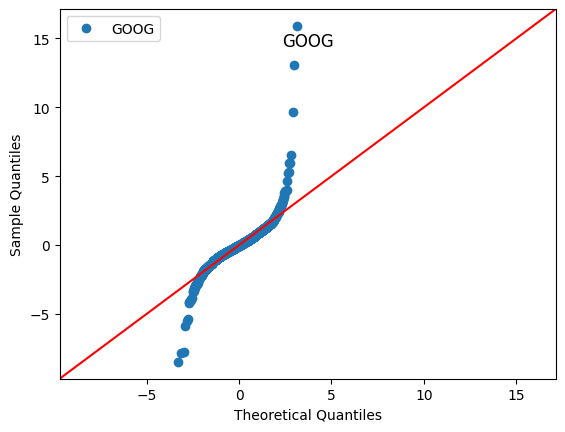

In [14]:
# Create Q-Q plot with 45-degree line added to plot
for stock_name, error in error_terms.items():
    fig = sm.qqplot(error, line='45', label=stock_name)
    plt.annotate(stock_name, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center')

plt.legend()
plt.show()

In a Q-Q plot, the x-axis displays the theoretical quantiles. This means it doesn’t show actual data, but instead it represents where data would be if it were normally distributed.

The y-axis displays actual data. This means that if the data values fall along a roughly straight line at a 45-degree angle, then the data is normally distributed.

We can see in our Q-Q plot above that the data values do not tend to closely follow the 45-degree, which means the data is not very normally distributed. However, the T stock follows it the best, and Tesla is among the worst.

CAPM, like many financial models, relies on certain assumptions, including the assumption that returns are normally distributed. When this assumption is violated, it means that the model's underlying statistical assumptions are not met, which can impact the validity of its results.

Non-normality of error terms suggests that there may be factors or behaviors in the data that the CAPM model doesn't account for. This can indicate that CAPM might not accurately capture the complexities of stock returns, and it might not be the best model.

Non-normality might also be an indication of market anomalies or structural breaks that the CAPM model doesn't account for. These anomalies could include sudden market crashes, bubbles, or other irregular events that can impact stock returns.

Although a Q-Q plot isn’t a formal statistical test, it offers an easy way to visually check whether or not a data set is normally distributed.

## Risky Portfolio
#### Selecting the 4 Riskier Assets

In this step, we aim to identify the top four riskier assets from the dataset. The criterion for selection is based on the calculated beta values, with higher betas indicating greater risk. The selected assets will be part of the portfolio.

We start by sorting the assets based on their beta values in descending order, which places the riskiest assets at the top of the list. The top four assets with the highest betas are considered the riskier assets for our portfolio.


In [15]:
# Top 4 riskier assets
sorted_results = results.sort_values(by='Beta', ascending=False)
top_riskier_assets = sorted_results.head(4)
print("Top 4 Riskier Assets:")
top_riskier_assets

Top 4 Riskier Assets:


,Stock,Alpha (%),Beta,R-squared,Alpha P-value,Beta P-value
3,MGM,-0.016893,1.653568,0.398728,0.712986,1.874186e-240
1,BA,-0.002292,1.382867,0.411941,0.951096,7.299279e-251
6,TSLA,0.175917,1.268611,0.150482,0.009920,1.965135e-78
0,AAPL,0.052837,1.112891,0.432070,0.067202,3.521164e-267


#### Creating an Equally Weighted Portfolio

Once we have identified the top four riskier assets, the next step is to form an equally weighted portfolio using these assets. An equally weighted portfolio assigns an equal weight to each asset, distributing the investment evenly among them.

We calculate the weight per asset, which is simply 1 divided by the number of assets in the portfolio (in this case, 4). Each asset is allocated 25% of the total portfolio value, as all assets have an equal weight.

The portfolio is formed by allocating the appropriate weight to each asset, ensuring that it is equally distributed among the selected riskier assets.


In [16]:
# Portfolio with the 4 risky assets
riskier_assets = top_riskier_assets.index.tolist()
weight_per_asset = 1 / len(riskier_assets)
portfolio_weights = {}
# Allocate 25% to each asset
for asset in riskier_assets:
    portfolio_weights[asset] = weight_per_asset


#### Estimating Portfolio Return Based on Beta and Market Return

In this step, we estimate the daily return of the portfolio using the calculated parameters, specifically the portfolio's weighted average beta (β) and the market return (rm).

The weighted average beta is computed by taking a weighted sum of the betas of the selected riskier assets, where the weights are based on the equally weighted portfolio allocation.

The market return is determined as the mean (average) of the market returns across the dataset.

Finally, the estimated daily portfolio return is calculated by multiplying the weighted average beta by the market return. This provides an estimation of the portfolio's expected return based on the risk profile of the selected assets and the overall market performance.


In [17]:
weighted_average_beta = sum(results.loc[asset, 'Beta'] * weight for asset, weight in portfolio_weights.items())
market_return = market_returns.mean()
portfolio_return = weighted_average_beta * market_return
print(f"Estimated Portfolio daily Return: {portfolio_return:.4f}")

Estimated Portfolio daily Return: 0.0668


---

# Task 3
## Computing Beta ($\beta_i^{y-1}$) using OLS Regression

In this subtask, we are calculating the beta ($\beta_i^{y-1}$) for each stock using Ordinary Least Squares (OLS) regression. The objective is to determine how each stock performed relative to the market index (in this case, 'sp500') over 252 business days at the end of each year ($y-1$).

### Code Explanation:
- We have set a time range from '2012-01-12' to '2020-08-11' as our dataset's start and end dates.
- We are working with daily data, and we ensure that the index is in datetime format.
- To calculate beta, we iterate through each year ($y-1$) and identify end-of-year dates.
- For each year, we select the corresponding stock price data and calculate the number of business days within that year.
- Within the loop for each year, we perform OLS regression for each stock using the stock's daily returns and the 'sp500' returns as independent variables.
- We extract and store the beta coefficient for each stock for the given year.
- Finally, we compile the results into a DataFrame 'beta_df', which contains the calculated beta values for each stock for each year ($y-1$).
- We didin't do the calculations for 2020 because it was incomplete but it can be computed if prefered.

### Interpretation:
- The beta values in the 'Beta' column of 'beta_df' represent how sensitive each stock's returns are to movements in the market index ('sp500') for each year.
- Beta values greater than 1 indicate that the stock tends to be more volatile than the market.
- Beta values less than 1 suggest that the stock is less volatile than the market.
- A beta of 1 implies that the stock moves in line with the market.

By following this code and methodology, we can analyze how the beta values of each stock change over time, providing valuable insights for investment strategies and risk assessment.

This revised markdown explanation reflects the code provided and explains the process of calculating end-of-year beta for each stock in detail.


In [18]:
start_date = pd.to_datetime('2012-01-12')
end_date = pd.to_datetime('2020-08-11')
daily.index = pd.to_datetime(daily.index)
#We include 2012 since it only misses a week, but exclude 2020 since its missig several.

# Create a list of end-of-year dates for each year y - 1
end_of_year_dates = pd.date_range(start=start_date, end=end_date, freq='Y') - pd.DateOffset(days=1)


beta_dfs = []

for i, year_end_date in enumerate(end_of_year_dates):
    if i == 0:
        year_start_date = pd.to_datetime(start_date)
    else:
        year_start_date = end_of_year_dates[i - 1] + pd.DateOffset(days=1)

    year_data = daily[(daily.index >= year_start_date) & (daily.index <= year_end_date)]

    # Calculate the number of business days in this year y - 1
    num_business_days = len(year_data)
    beta_data = []  # List to store individual DataFrames for each stock

    for stock in year_data.columns[:-1]:
        Y = year_data[stock]
        X = sm.add_constant(year_data['sp500'])
        model = sm.OLS(Y, X, missing='drop').fit()

        # Extract and store the beta coefficient for this year
        beta_i = model.params[1]
        beta_data.append({'Year': year_end_date.year, 'Stock': stock, 'Beta': beta_i})

    beta_df = pd.DataFrame(beta_data)
    beta_dfs.append(beta_df)

beta_df = pd.concat(beta_dfs, ignore_index=True)
beta_df

,Year,Stock,Beta
0,2012,AAPL,1.259534
1,2012,BA,1.033176
2,2012,T,0.615171
3,2012,MGM,1.743779
4,2012,AMZN,1.119867
5,2012,IBM,0.862370
6,2012,TSLA,1.620364
7,2012,GOOG,0.864888
8,2013,AAPL,0.667618
9,2013,BA,0.955673


## Comparing Actual vs. Predicted Returns Using CAPM Model

In this subtask, we are comparing the actual annualized average return of each stock ($\bar{r}_i^y$) at the end of year $y$ to the return predicted by the Capital Asset Pricing Model (CAPM) ($\hat{r}_M^y$). The CAPM prediction incorporates the beta ($\beta_i^{y-1}$) measured at the end of the previous year ($y-1$), along with the average market return ($\bar{r}_M^y$) measured at year $y$.

### Code Explanation:
- We iterate through each year in the dataset and perform the following steps for each year $y$:
  - We calculate the annualized average return ($\bar{r}_i^y$) for each stock.
  - We find the corresponding beta ($\beta_i^{y-1}$) for each stock and year $y-1$ from the previously calculated betas.
  - Using the CAPM model, we predict the return ($\hat{r}_M^y$) for each stock based on its beta and the annualized market return ($\bar{r}_M^y$) for year $y$.
  - We then compare the actual stock return to the predicted return. If the actual return exceeds the predicted return, it's marked as "Exceeds"; otherwise, it's marked as "Falls Short."
- The results are compiled into a DataFrame 'comparison_df,' which contains information about the actual and predicted returns for each stock in each year, along with the comparison result.

### Interpretation:
- This analysis helps us assess how stocks performed relative to their predicted returns based on the CAPM model.
- If a stock's actual return exceeds its predicted return, it may be considered an attractive investment.
- Conversely, if a stock's actual return falls short of the predicted return, it may raise questions about its performance.
- By conducting this analysis over multiple years, we can gain insights into which stocks consistently outperform or underperform their CAPM-predicted returns, providing valuable information for investment strategies.


In [19]:
#Actual vs Predicted return
comparison_dfs = []
for year in daily.index.year.unique():
    year_data = daily[daily.index.year == year]
    stock_comparison_data = []

    # Calculate the annualized average return of each stock
    for stock in stocks:
        stock_data_y = year_data[stock]
        annualized_stock_return = stock_data_y.mean() * 252

        # Find the corresponding beta for this stock and year (y-1)
        beta_row = beta_df[(beta_df['Year'] == (year - 1)) & (beta_df['Stock'] == stock)]

        if not beta_row.empty:
            beta_i_y_minus_1 = beta_row.iloc[0]['Beta']

            # Calculate the predicted return using CAPM
            annualized_market_return_y = year_data['sp500'].mean() * 252
            predicted_return = beta_i_y_minus_1 * annualized_market_return_y

            comparison = "Exceeds" if annualized_stock_return > predicted_return else "Falls Short"

            stock_comparison_df = pd.DataFrame({'Year': [year], 'Stock': [stock],
                                                'Actual_Return': [annualized_stock_return],
                                                'Predicted_Return': [predicted_return],
                                                'Comparison': [comparison]})
            stock_comparison_data.append(stock_comparison_df)

    if stock_comparison_data:
        year_comparison_df = pd.concat(stock_comparison_data, ignore_index=True)
        comparison_dfs.append(year_comparison_df)

comparison_df = pd.concat(comparison_dfs, ignore_index=True)
comparison_df

,Year,Stock,Actual_Return,Predicted_Return,Comparison
0,2013,AAPL,9.405672,33.444512,Falls Short
1,2013,BA,61.704462,27.434016,Exceeds
2,2013,T,5.428876,16.334695,Falls Short
3,2013,MGM,74.690347,46.302697,Exceeds
4,2013,AMZN,50.009649,29.735931,Exceeds
5,2013,IBM,-0.337642,22.898570,Falls Short
6,2013,TSLA,171.840652,43.025647,Exceeds
7,2013,GOOG,48.361531,22.965434,Exceeds
8,2014,AAPL,34.371120,7.633863,Exceeds
9,2014,BA,-3.013858,10.927617,Falls Short


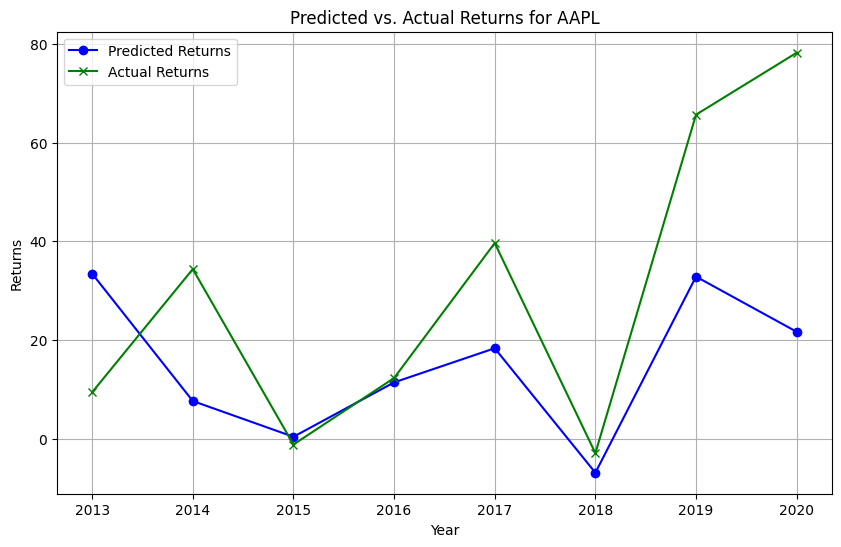

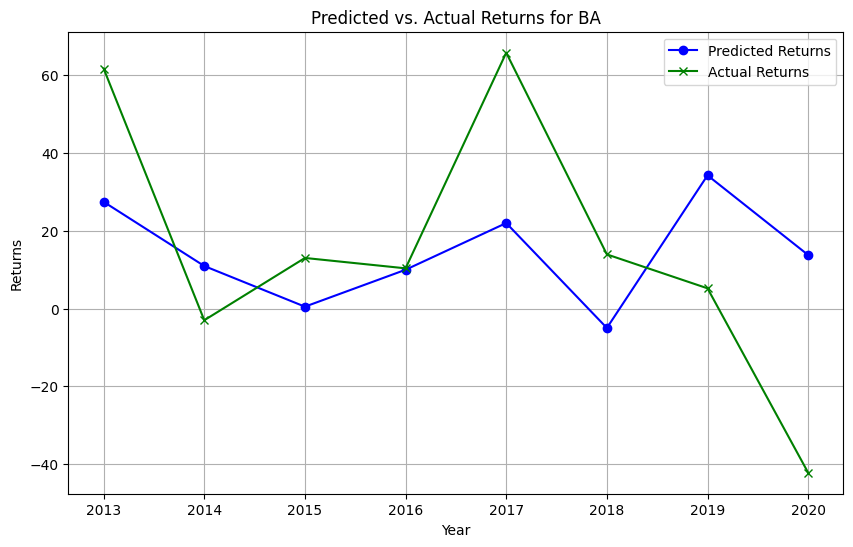

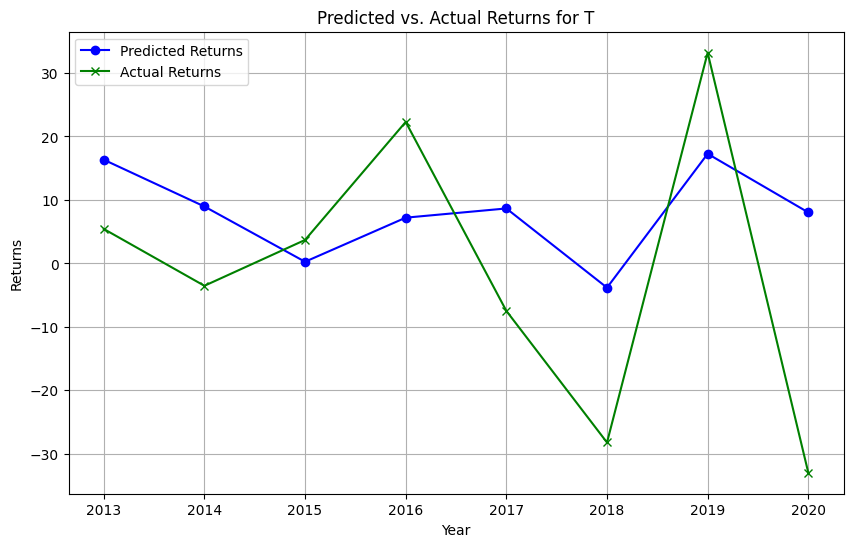

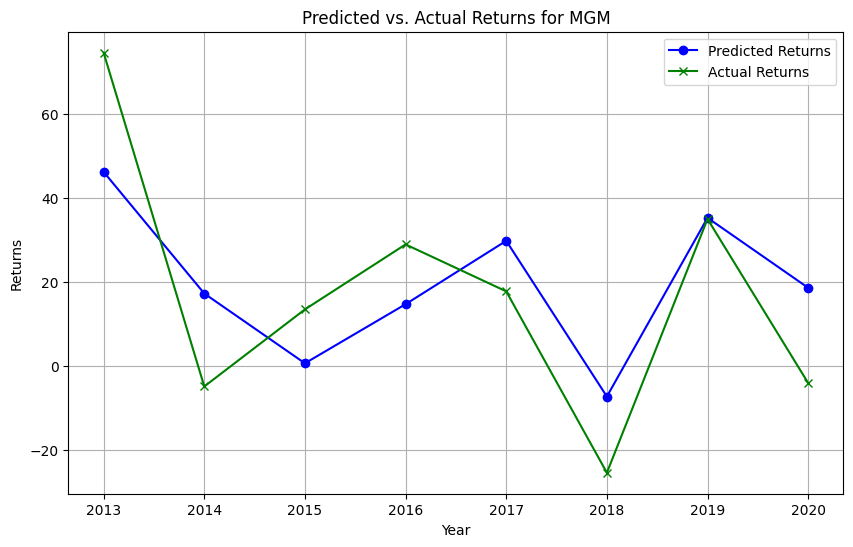

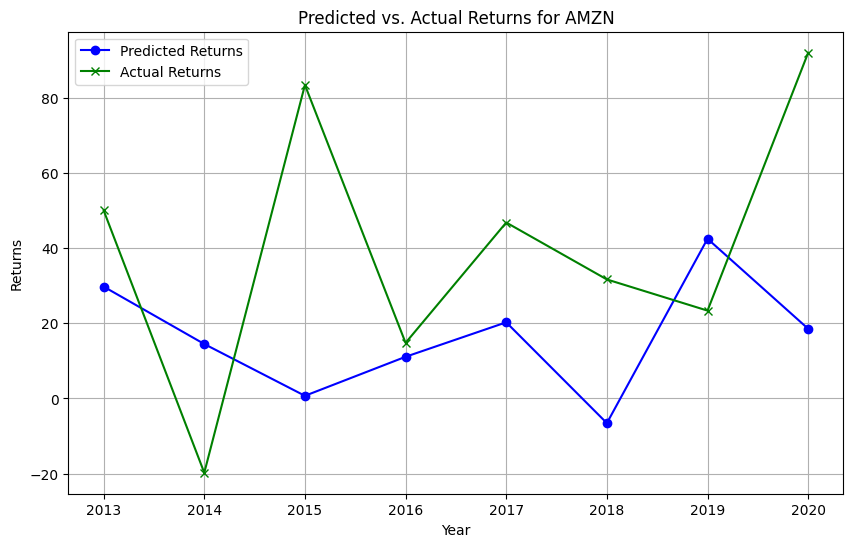

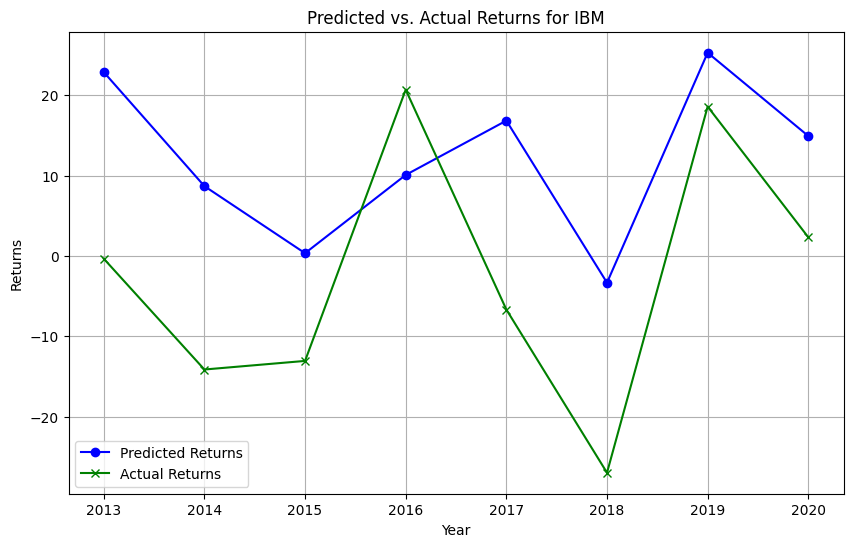

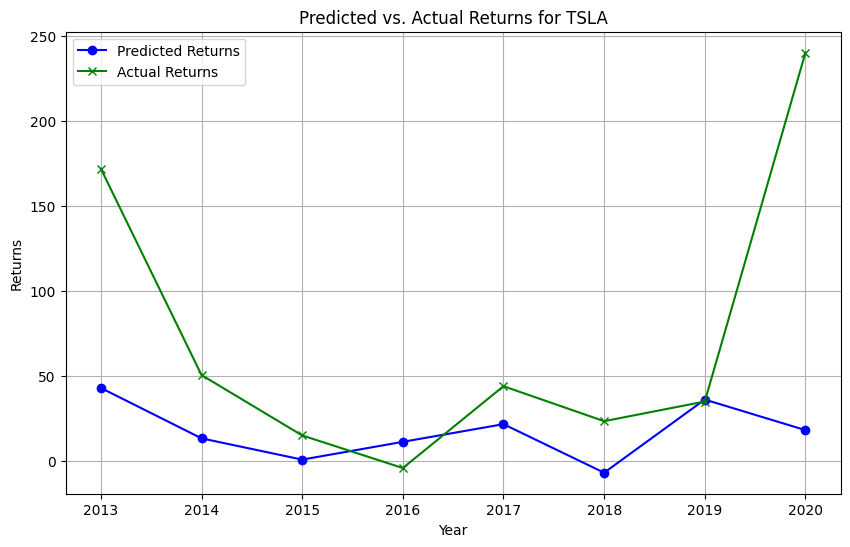

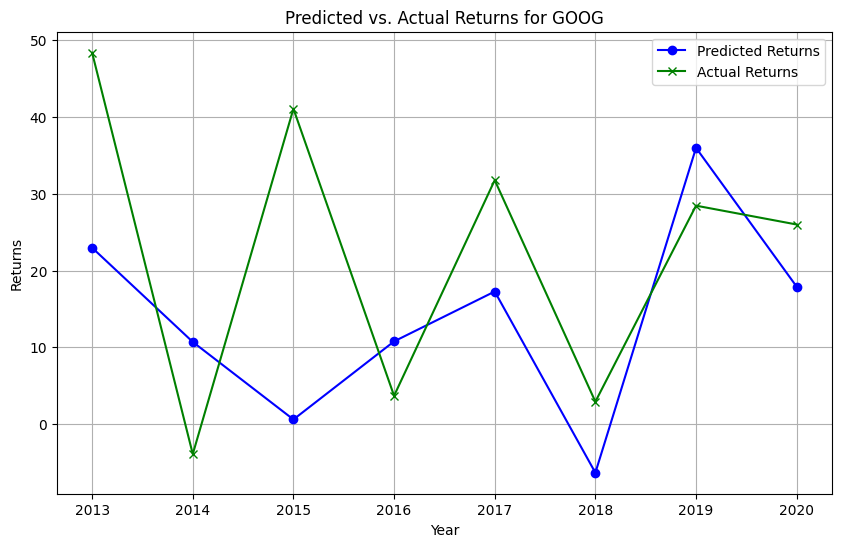

In [20]:
# Get a list of unique stocks
unique_stocks = comparison_df['Stock'].unique()

# Create individual plots for each stock
for stock in unique_stocks:
    stock_df = comparison_df[comparison_df['Stock'] == stock]

    # Create a figure and axis for each stock
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Plot Predicted Returns in blue
    plt.plot(stock_df['Year'], stock_df['Predicted_Return'], label='Predicted Returns', color='blue', marker='o')

    # Plot Actual Returns in green
    plt.plot(stock_df['Year'], stock_df['Actual_Return'], label='Actual Returns', color='green', marker='x')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.title(f'Predicted vs. Actual Returns for {stock}')

    # Add a legend
    plt.legend()

    # Show the plot for the current stock
    plt.grid(True)
    plt.show()
#This code will generate individual line charts for each stock, with each chart showing the actual and predicted returns for that specific stock over the years.


Overal Predicted return are follwing almost a mooth flat line, while realized ones hit severe spikes and falls. It seems like CAPM is not capable of following such sudden changes.

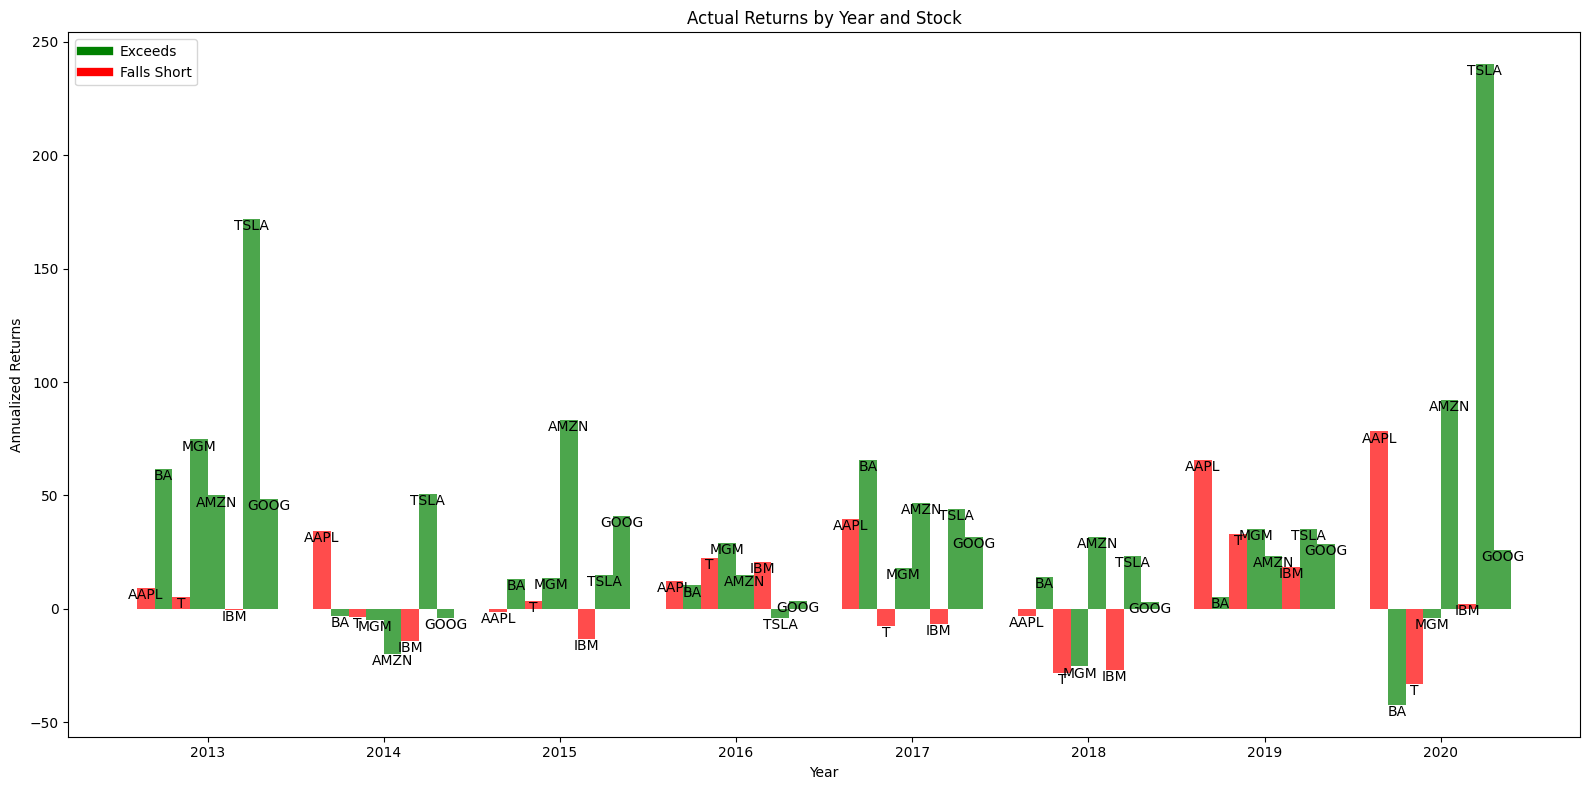

In [21]:
colors = {'Exceeds': 'green', 'Falls Short': 'red'}
comparison_df['Color'] = comparison_df['Comparison'].map(colors)
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.1

# Plot bars for stocks
for i, stock in enumerate(comparison_df['Stock'].unique()):
    stock_data = comparison_df[comparison_df['Stock'] == stock]
    x = stock_data['Year'] + i * bar_width
    y = stock_data['Actual_Return']
    color = stock_data['Color'].iloc[0]
    ax.bar(x, y, width=bar_width, label=stock, color=color, alpha=0.7)

    for xi, yi in zip(x, y):
        ax.text(xi, yi - 0.02, stock, ha='center', va='top', rotation=0, fontsize=10, color='black')

ax.set_xticks(comparison_df['Year'].unique() + (bar_width * (len(comparison_df['Stock'].unique()) - 1)) / 2)
ax.set_xticklabels(comparison_df['Year'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Annualized Returns')
ax.set_title('Actual Returns by Year and Stock')
legend_labels = [plt.Line2D([0], [0], color=color, lw=6) for color in colors.values()]
ax.legend(legend_labels, colors.keys())
plt.tight_layout()
plt.show()


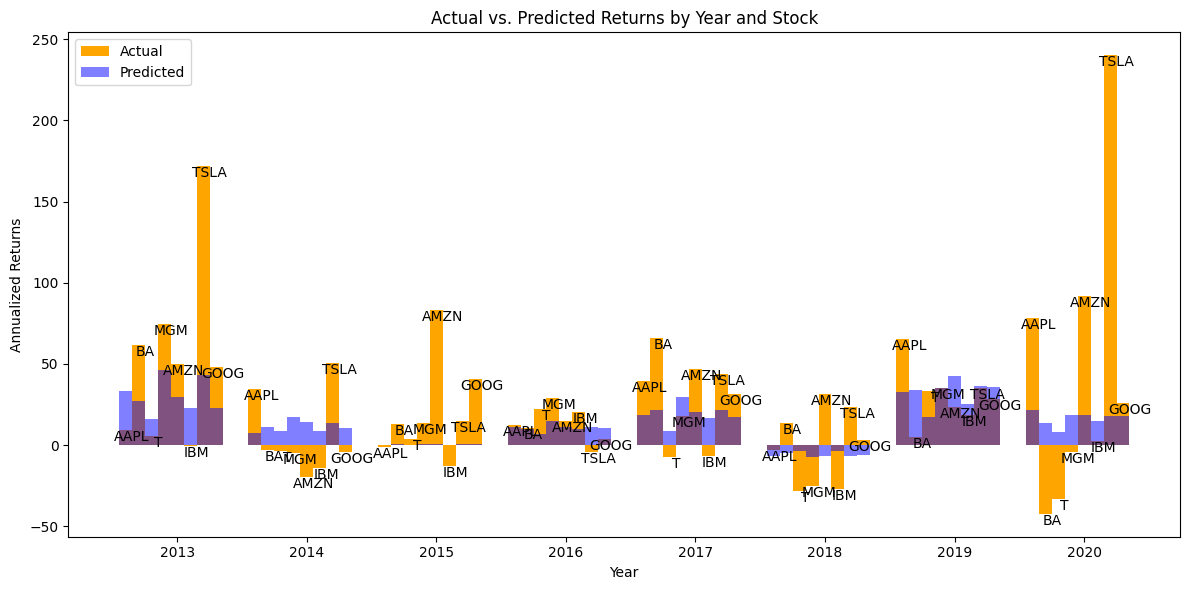

In [22]:
years = comparison_df['Year'].unique()
stocks = comparison_df['Stock'].unique()
bar_width = 0.1
index = np.arange(len(years))
fig, ax = plt.subplots(figsize=(12, 6))
for i, stock in enumerate(stocks):
    stock_data = comparison_df[comparison_df['Stock'] == stock]
    actual_returns = stock_data['Actual_Return']
    predicted_returns = stock_data['Predicted_Return']
    actual_bars = ax.bar(index + (i * bar_width), actual_returns, bar_width, label=f'{stock}', color='orange', alpha=1)
    predicted_bars = ax.bar(index + (i * bar_width), predicted_returns, bar_width, color='blue', alpha=0.5)

    for xi, yi in zip(index + (i * bar_width) + (bar_width / 2), actual_returns):
        ax.text(xi, yi - 0.02, stock, ha='center', va='top', rotation=0, fontsize=10, color='black')

ax.set_xticks(index + (bar_width * (len(stocks) / 2)))
ax.set_xticklabels(years)
ax.set_xlabel('Year')
ax.set_ylabel('Annualized Returns')
ax.set_title('Actual vs. Predicted Returns by Year and Stock')
ax.legend(['Actual', 'Predicted'], loc='upper left')
plt.tight_layout()
plt.show()


Apple, T, and IBMs predictions are always lower. overall we are not doing a very good job.
CAPM is a simplification of real-world financial markets and makes several assumptions that may not hold in practice. For example, it assumes that returns are normally distributed, that investors have homogenous expectations, and that there are no taxes or transaction costs. Violations of these assumptions can lead to differences between predicted and realized returns.

A stock's beta can change over time due to changes in the company's business risk, financial leverage, or market conditions. using a fixed beta in CAPM calculations, may not accurately reflect the changing risk profile of the stock.

Real-world markets can exhibit anomalies or patterns that CAPM may not account for. Some stocks may outperform or underperform their expected returns due to factors like momentum, value, or investor sentiment that CAPM does not consider.

CAPM assumes that all non-systematic risk (company-specific risk) is diversified away. However, individual companies may have unique factors affecting their returns, such as management decisions, competitive advantages, or industry-specific events.



## Technology Sector Success

Notably, technology-related stocks like **AAPL** (Apple Inc.), **AMZN** (Amazon.com, Inc.), **TSLA** (Tesla, Inc.), and **GOOG** (Alphabet Inc.) consistently outperformed their CAPM-predicted returns in the dataset. This suggests that the technology sector demonstrated robust performance during the years covered.

### Probable Key Factors Behind Tech Sector Success:

1. **Innovation**: Technology companies are known for their innovation-driven approach. They continuously develop new products, services, and technologies, which can drive revenue growth and investor confidence.

2. **Market Demand**: Strong market demand for tech products and services played a significant role in the success of these companies. Consumers and businesses increasingly rely on technology solutions, leading to increased sales and profitability.

3. **Consumer Behavior**: Shifts in consumer behavior, including the adoption of e-commerce, cloud computing, electric vehicles, and digital advertising, favored these tech giants. Their ability to adapt to changing consumer preferences contributed to their success.

The consistent outperformance of these technology-related stocks highlights the sector's resilience and adaptability in a dynamic market environment.


### As suggested, we will compute Beta quarterly and redo the above calculations.

In [24]:
# Create a list of end-of-quarter dates
end_of_quarter_dates = pd.date_range(start=start_date, end=end_date, freq='Q') - pd.DateOffset(days=1)
beta_dfs_q = []
for i, quarter_end_date in enumerate(end_of_quarter_dates):
    if i == 0:
        quarter_start_date = pd.to_datetime(start_date)
    else:
        quarter_start_date = end_of_quarter_dates[i - 1] + pd.DateOffset(days=1)

    quarter_data = daily[(daily.index >= quarter_start_date) & (daily.index <= quarter_end_date)]
    stock_beta_data = []

    for stock in quarter_data.columns[:-1]:
        Y = quarter_data[stock]
        X = sm.add_constant(quarter_data['sp500'])
        model = sm.OLS(Y, X, missing='drop').fit()
        beta_i = model.params[1]
        stock_beta_df = pd.DataFrame({'Quarter': [quarter_end_date], 'Stock': [stock], 'Beta': [beta_i]})
        stock_beta_data.append(stock_beta_df)

    if stock_beta_data:
        quarter_beta_df = pd.concat(stock_beta_data, ignore_index=True)
        beta_dfs_q.append(quarter_beta_df)

beta_df_q = pd.concat(beta_dfs_q, ignore_index=True)
beta_df_q

,Quarter,Stock,Beta
0,2012-03-30,AAPL,0.988317
1,2012-03-30,BA,0.927651
2,2012-03-30,T,0.559639
3,2012-03-30,MGM,2.371587
4,2012-03-30,AMZN,0.655182
5,2012-03-30,IBM,0.528529
6,2012-03-30,TSLA,2.287480
7,2012-03-30,GOOG,0.645524
8,2012-06-29,AAPL,1.239728
9,2012-06-29,BA,1.287245


In [25]:
comparison_dfs_q = []

for quarter in beta_df_q['Quarter'].unique():
    quarter = pd.to_datetime(quarter)
    year = quarter.year
    qtr = quarter.quarter
    quarter_data = daily[(daily.index.year == year) & (daily.index.quarter == qtr)]
    stock_comparison_data_q = []

    for stock in stocks:
        stock_data_q = quarter_data[stock]
        num_trading_days = len(stock_data_q)
        quarterly_stock_return = stock_data_q.mean() * num_trading_days  # Quarterly return

        # Find the corresponding beta for this stock and quarter (q-1)
        beta_row = beta_df_q[(beta_df_q['Quarter'] == (quarter - pd.DateOffset(months=3)))
                             & (beta_df_q['Stock'] == stock)]

        if not beta_row.empty:
            beta_i_q_minus_1 = beta_row.iloc[0]['Beta']

            # Calculate the predicted return using CAPM for the quarter
            quarterly_market_return_q = quarter_data['sp500'].mean() * num_trading_days
            predicted_return = beta_i_q_minus_1 * quarterly_market_return_q

            comparison = "Exceeds" if quarterly_stock_return > predicted_return else "Falls Short"

            stock_comparison_df_q = pd.DataFrame({'Quarter': [quarter], 'Stock': [stock],
                                                  'Actual_Return': [quarterly_stock_return],
                                                  'Predicted_Return': [predicted_return],
                                                  'Comparison': [comparison]})

            stock_comparison_data_q.append(stock_comparison_df_q)

    if stock_comparison_data_q:
        quarter_comparison_df_q = pd.concat(stock_comparison_data_q, ignore_index=True)
        comparison_dfs_q.append(quarter_comparison_df_q)

comparison_df_q = pd.concat(comparison_dfs_q, ignore_index=True)
comparison_df_q

,Quarter,Stock,Actual_Return,Predicted_Return,Comparison
0,2012-09-29,AAPL,13.888118,7.151898,Exceeds
1,2012-09-29,BA,-6.106654,7.426019,Falls Short
2,2012-09-29,T,5.837668,2.703402,Exceeds
3,2012-09-29,MGM,-2.042039,9.946573,Falls Short
4,2012-09-29,AMZN,11.567430,6.012254,Exceeds
5,2012-09-29,IBM,6.208440,5.097232,Exceeds
6,2012-09-29,TSLA,-2.692805,10.617673,Falls Short
7,2012-09-29,GOOG,26.736353,5.272153,Exceeds
8,2013-03-30,AAPL,-16.634778,16.551995,Falls Short
9,2013-03-30,BA,13.612751,7.483121,Exceeds


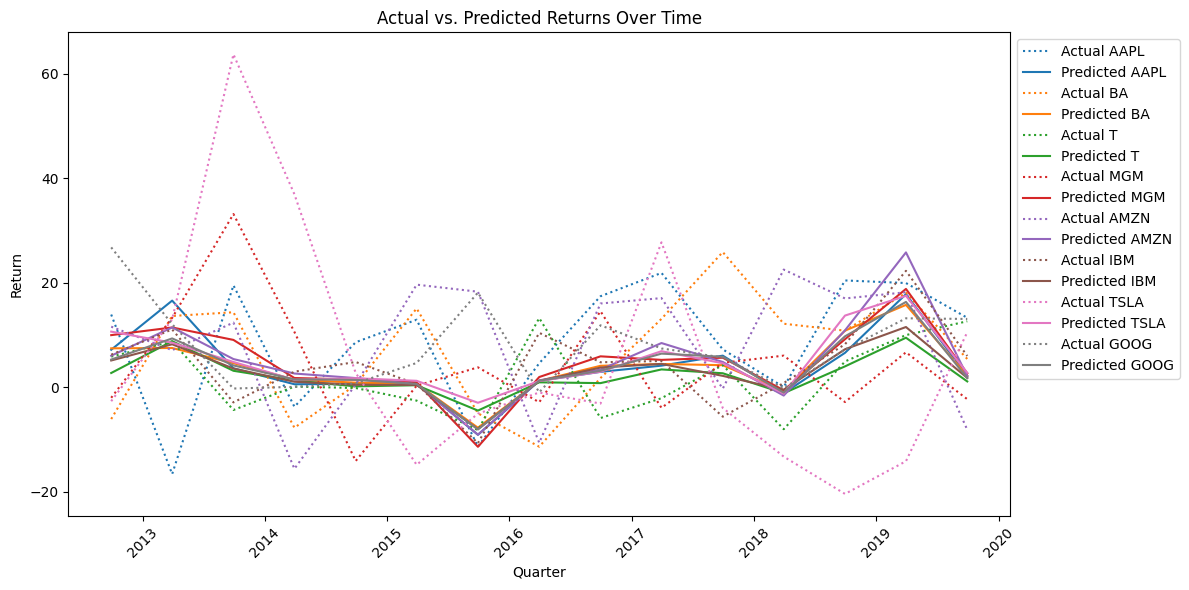

In [26]:
comparison_df_q_modified = comparison_df_q[comparison_df_q['Quarter'].dt.year < 2020]
fig, ax = plt.subplots(figsize=(12, 6))

for stock in comparison_df_q_modified['Stock'].unique():
    stock_data = comparison_df_q_modified[comparison_df_q_modified['Stock'] == stock]
    ax.plot(stock_data['Quarter'], stock_data['Actual_Return'], label=f'Actual {stock}', linestyle='dotted')
    ax.plot(stock_data['Quarter'], stock_data['Predicted_Return'], label=f'Predicted {stock}',
            linestyle='-', color=ax.lines[-1].get_color())
ax.set_xlabel('Quarter')
ax.set_ylabel('Return')
ax.set_title('Actual vs. Predicted Returns Over Time')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As seen before, predictions almost stay in a line, while relaizations do not eventhough we tried to increase accuracy by calculating in a shorter time frame.

---

# Task 4

In this task, we will perform web scraping to retrieve the list of S&P 500 tickers from Wikipedia. This list of tickers will serve as input for the yfinance package, an API that provides access to Yahoo Finance data. The following steps will be undertaken:

1. **Web Scraping**: We will use web scraping techniques, possibly with the BeautifulSoup library (bs4), to extract the S&P 500 tickers from the Wikipedia page.

2. **Data Retrieval with yfinance**: Once we have the list of tickers, we will utilize the yfinance package to download financial data for these tickers. The API call will look like this:
   
   ```python
   data = yf.download(ticker, start=start_date, end=end_date)


In [27]:
import requests
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})
    sp500_tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.strip()
        sp500_tickers.append(ticker)
    print(sp500_tickers)

else:
    print("Failed to retrieve data from the URL")

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CM

In [28]:
len(sp500_tickers)

502

In [29]:
sp500_data = None
for ticker in sp500_tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    if sp500_data is None:
        sp500_data = data
    else:
        sp500_data = pd.concat([sp500_data, data])

sp500_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABNB']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-01-12 00:00:00 -> 2020-08-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGN']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1326344400, endDate = 1597118400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [30]:
sp500_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-12,84.370003,84.639999,83.760002,84.279999,58.789417,3649900.0,MMM
1,2012-01-13,83.750000,84.120003,83.070000,83.599998,58.315071,3092900.0,MMM
2,2012-01-17,84.849998,85.360001,84.129997,84.230003,58.754524,2694900.0,MMM
3,2012-01-18,84.139999,85.120003,84.019997,85.070000,59.340485,3721100.0,MMM
4,2012-01-19,85.099998,86.230003,84.919998,85.800003,59.849689,3413700.0,MMM


In [31]:
pivot_table = sp500_data.pivot_table(index='Date', columns='Ticker', values=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
pivot_table.head()

Adj Close                                                  \
Ticker              A       AAL       AAPL ABBV        ABT       ACGL   
Date                                                                    
2012-01-12  25.491037  5.703587  12.774085  NaN  20.970198  12.403333   
2012-01-13  25.194323  5.628166  12.726187  NaN  21.072844  12.390000   
2012-01-17  25.794195  5.543320  12.874425  NaN  21.179283  12.313333   
2012-01-18  26.619820  5.694159  13.008111  NaN  21.046234  12.320000   
2012-01-19  26.993925  5.901562  12.966881  NaN  21.072844  12.296667   

                                                        ...     Volume  \
Ticker            ACN       ADBE        ADI        ADM  ...       WYNN   
Date                                                    ...              
2012-01-12  43.251335  29.230000  28.315741  21.372660  ...  6974000.0   
2012-01-13  42.698067  28.969999  27.792086  21.394659  ...  2641400.0   
2012-01-17  42.890514  29.350000  28.110830  21.108620  ...  3459400.0   
2012-01-18  44.061195  29.889999  29.712177  21.431341  ...  2978200.0   
2012-01-19  43.940914  30.240000  30.106813  21.578020  ...  2153600.0   

                                                                               \
Ticker            XEL         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2012-01-12  3898800.0  17357200.0   701000.0   709300.0  4792691.0  1604122.0   
2012-01-13  3162300.0  15551600.0   524600.0   886200.0  5074646.0  1077689.0   
2012-01-17  3646100.0  15627900.0   695800.0   465400.0  4190805.0  1495869.0   
2012-01-18  2197000.0  16754200.0  1102500.0  1453700.0  5246852.0  1347961.0   
2012-01-19  2522800.0  16383500.0  1558000.0   838000.0  5009687.0  1873467.0   

                                     
Ticker          ZBRA       ZION ZTS  
Date                                 
2012-01-12  190700.0  3832200.0 NaN  
2012-01-13  190300.0  2305200.0 NaN  
2012-01-17   95100.0  2545600.0 NaN  
2012-01-18   86400.0  3065800.0 NaN  
2012-01-19  132700.0  3132900.0 NaN  

[5 rows x 2964 columns]

In [32]:
pivot_table[('Open','AAPL')]

Date
2012-01-12     15.081429
2012-01-13     14.989286
2012-01-17     15.150000
2012-01-18     15.248571
2012-01-19     15.362500
2012-01-20     15.267500
2012-01-23     15.095357
2012-01-24     15.182143
2012-01-25     16.230000
2012-01-26     16.012857
2012-01-27     15.869286
2012-01-30     15.918214
2012-01-31     16.271070
2012-02-01     16.371786
2012-02-02     16.282143
2012-02-03     16.332144
2012-02-06     16.370714
2012-02-07     16.616072
2012-02-08     16.803572
2012-02-09     17.170000
2012-02-10     17.534286
2012-02-13     17.840357
2012-02-14     18.023571
2012-02-15     18.366428
2012-02-16     17.553572
2012-02-17     17.968214
2012-02-21     18.102858
2012-02-22     18.324286
2012-02-23     18.395714
2012-02-24     18.559643
2012-02-27     18.618214
2012-02-28     18.855715
2012-02-29     19.341429
2012-03-01     19.577499
2012-03-02     19.437143
2012-03-05     19.479286
2012-03-06     18.702143
2012-03-07     19.171429
2012-03-08     19.096071
2012-03-09     19.43

## Data Columns Explanation and General Overview

### Data Columns:
- **Open**: This column represents the opening price of the stock for the given time period.
- **Low**: The lowest price the stock traded at during the same period.
- **High**: The highest price the stock reached during the same period.
- **Close**: The closing price of the stock, which is the last price it traded at during the specified time frame.
- **Volume**: This column indicates the total number of shares traded during the time period.
- **Adj Close**: The adjusted closing price accounts for events like dividends, stock splits, and other corporate actions that can affect the stock's price.

### General Description:
- These columns are fundamental in analyzing stock market data as they provide key insights into a stock's performance.
- The "Open" and "Close" prices help in understanding the price movement during the trading day, with "Open" being the starting point and "Close" being the ending point.
- "Low" and "High" prices reflect the stock's price range during the given period, indicating volatility.
- "Volume" indicates the level of trading activity; higher volumes often signify increased investor interest or news events.
- "Adj Close" is especially important for long-term investors as it accounts for corporate actions that can distort the historical stock price.
- "Why do you have more variables than in the PCLab_Data.xlsx file ?" Well, it's a bit of a mystery, isn't it? Unfortunately, we're not psychic, so we can't quite delve into the depths of our esteemed professor's mind to decipher the reasons behind their decisions.
    - Jokes aside, The closing price of a stock represents its final traded price for the day, and it is often considered a significant indicator in technical analysis and long-term investment strategies. Close prices are less susceptible to intraday fluctuations and noise, making them a stable reference point for evaluating a stock's performance over time. Therefore, many financial models and strategies, such as calculating daily returns or moving averages, primarily rely on close prices.

